In [ ]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs

     |████████████████████████████████| 92kB 5.0MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 6.5MB 13.5MB/s 
     |████████████████████████████████| 1.3MB 46.9MB/s 
     |████████████████████████████████| 552kB 39.1MB/s 
     |████████████████████████████████| 296kB 44.2MB/s 
     |████████████████████████████████| 143kB 46.0MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=6dbbc026001a129083618d89174564f13ab48b7d9b7b2685341d362d33443c48
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Preparing the Data

In [ ]:
df_curve = pd.read_csv('s3://lfspf/Yield.csv')
df_curve.head()

,T,1Y,2Y,3Y,4Y,5Y,7Y,10Y,30Y
0,2001-01-02,4.692,4.5650,4.6550,4.7550,4.870,5.102,5.345,5.742
1,2001-01-03,4.619,4.5715,4.6550,4.7600,4.870,5.089,5.306,5.716
2,2001-01-04,4.526,4.5350,4.6650,4.7725,4.885,5.103,5.324,5.734
3,2001-01-05,4.458,4.4588,4.5888,4.7138,4.830,5.046,5.278,5.703
4,2001-01-08,4.451,4.4738,4.5850,4.7050,4.830,5.050,5.264,5.694


In [ ]:
df_curve.set_index('T',inplace=True)
df_curve = df_curve.diff()

In [ ]:
df_curve.dropna(how='any',inplace=True)
dr = df_curve.values

Principal Components

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(dr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

First Component

Text(0.5, 1.0, 'Eigenvector 4')

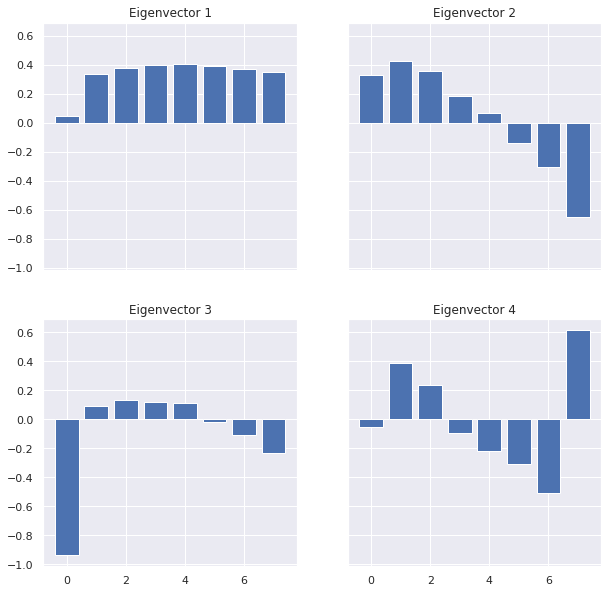

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
nbr = 1
ax[0,0].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[0,0].set_title('Eigenvector '+str(nbr))

nbr = 2
ax[0,1].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[0,1].set_title('Eigenvector '+str(nbr))

nbr = 3
ax[1,0].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[1,0].set_title('Eigenvector '+str(nbr))

nbr = 4
ax[1,1].bar(x=np.arange(0,pca.components_.shape[0]),height= pca.components_[nbr-1,:]);
ax[1,1].set_title('Eigenvector '+str(nbr))
